Tasks:
* Create cronjob
* Web scrapping
* Download zip file
* Unzip it
* Read file which name start with "lotto_"

Preparation:
* Read file
* Extract columns 'boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'numero_chance', year
* Set custom range of rows (slider or input), predefine ranges - last 50, all, etc.

Analysis:
* Odd / Even - (3 odd + 2 even - 814 times)
* Define patterns: (1-9 - blue, 10-19 - yellow, etc) occurencies (by year) count and PROBABILITY https://lottometrix.com/members/analysis-euromillions.php
* Top Hot - most occurencies in row range
* Top Cold - less occurencies on row range
* Overdue - Number which isn't drawn for a long time (show be beyond range)
* Pairs and frequency (2,14 - 5 times)
* Sum and frequency (sum of all numbers: 132 - 56 times)
* Low / High - split on 24(or 25) occurencies - (3 low, 2 high - 529 times)
* Consecutives (0 - 1144 times, 1 - 311 times)
* Regularity (each number is + 7) or (+7 +8 + 9 etc)
* Following numbers
* Non following numbers
* Average numbers
* Heat map chart

AI:
* Split analysis on two groups: probability and history. Set each of them value. History value should be lesser than prob one

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = "loto_201911.csv"
# Create a DataFrame with all possible numbers from 1 to 49
all_numbers = pd.DataFrame({'number': range(1, 50)})

In [3]:
df = pd.read_csv(file_name, sep=";")

In [4]:
df = df[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'numero_chance', 'date_de_tirage']]

In [5]:
df.head()

,boule_1,boule_2,boule_3,boule_4,boule_5,numero_chance,date_de_tirage
0,12,28,32,45,38,9,10/01/2024
1,6,48,11,49,46,2,08/01/2024
2,49,19,22,40,45,2,06/01/2024
3,36,1,45,9,14,3,03/01/2024
4,4,41,16,13,6,10,01/01/2024


In [6]:
range_col = df['numero_chance']

Pivot 2:
 number
1     3
2     1
3     2
4     2
5     1
6     2
7     3
8     0
9     2
10    0
11    2
12    4
13    2
14    1
15    3
16    4
17    0
18    1
19    2
20    0
21    0
22    2
23    0
24    0
25    1
26    2
27    0
28    4
29    2
30    3
31    1
32    2
33    0
34    1
35    0
36    3
37    0
38    2
39    1
40    2
41    3
42    0
43    0
44    1
45    3
46    1
47    1
48    2
49    3
dtype: int64


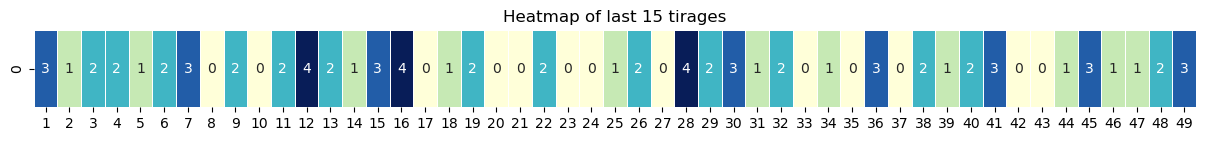

Pivot 2:
 number
1      8
2      3
3      6
4      5
5      3
6      7
7      5
8      3
9      6
10     5
11     4
12     8
13     9
14     5
15     6
16     9
17     5
18     3
19     7
20     3
21     4
22     8
23     3
24     1
25     8
26     7
27     5
28     7
29     5
30    11
31     5
32     5
33     2
34     5
35     3
36     4
37     4
38     4
39     2
40     9
41     7
42     1
43     1
44     3
45     5
46     8
47     3
48     5
49     5
dtype: int64


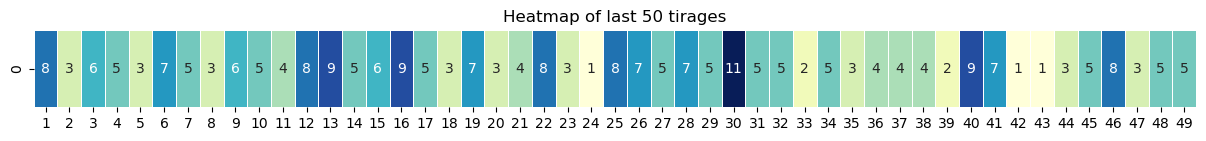

Pivot 2:
 number
1     60
2     54
3     68
4     65
5     69
6     71
7     77
8     63
9     73
10    63
11    64
12    75
13    68
14    62
15    77
16    62
17    70
18    54
19    65
20    57
21    61
22    79
23    63
24    72
25    61
26    77
27    63
28    71
29    63
30    69
31    79
32    67
33    60
34    64
35    77
36    58
37    64
38    75
39    60
40    65
41    72
42    68
43    55
44    78
45    64
46    73
47    67
48    71
49    67
dtype: int64


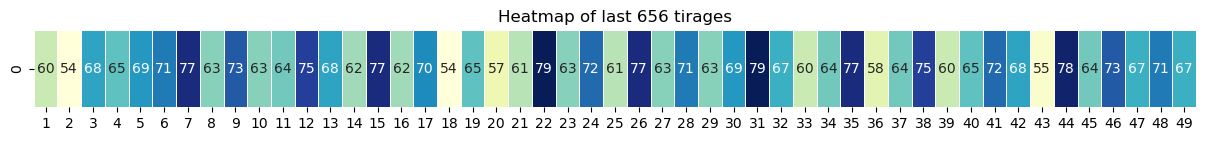

In [8]:
# HEATMAP
def show_heat_map(last_tirages = 1000000):
    df = pd.read_csv(file_name, sep=";", nrows=last_tirages)
    # Reshape the DataFrame to a single column
    flat_df = pd.melt(df, value_vars=['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5'],
                      var_name='boule', value_name='number')
    # print(f'Melt:\n{flat_df}')
    
    tirages_count = int(len(flat_df) / 5)

    # Create a pivot table to count the occurrences of each number
    heatmap_data = flat_df.pivot_table(index='number', aggfunc='size', fill_value=0)
    # print(f'Pivot:\n {heatmap_data}')
    
    # Add missing values from 1 to 49 with a count of 0
    heatmap_data = heatmap_data.reindex(index=range(1, 50), fill_value=0)
    print(f'Pivot 2:\n {heatmap_data}')

    # Get the numbers as the x-axis labels
    numbers = heatmap_data.index
    # print(numbers)

    # Reshape the DataFrame to a 1D array
    heatmap_data = heatmap_data.values

    # Create a heatmap
    plt.figure(figsize=(15, 1))
    # print(heatmap_data.reshape(1, -1))
    sns.heatmap(heatmap_data.reshape(1, -1), cmap='YlGnBu', annot=True, fmt='d', linewidths=.5, cbar=False,
                xticklabels=numbers)
    plt.title(f'Heatmap of last {tirages_count} tirages')
    plt.show()

    
show_heat_map(15)
show_heat_map(50)
show_heat_map()